# Heart Failure Clinical Records Clustering Analysis

## This notebook provides a comprehensive clustering analysis of heart failure clinical records with visualizations, multiple evaluation metrics, and detailed insights.

# Import Libraries and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Load and Explore the Dataset

In [2]:
# Load the heart failure dataset from UCI ML Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"

try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully")
except:
    print("Loading from URL failed, using local file")
    df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

print(f"\n Dataset Shape: {df.shape}")
print(f"Features: {list(df.columns)}")
print(f"\n Dataset Info:")
print(df.info())

Dataset loaded successfully

 Dataset Shape: (299, 13)
Features: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex        

# Data Exploration

In [3]:
print("Dataset Statistics:")
print(df.describe())
print(f"\n Missing Values:")
print(df.isnull().sum())
print(f"\n First 5 rows:")
df.head()

Dataset Statistics:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.00

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Visualization

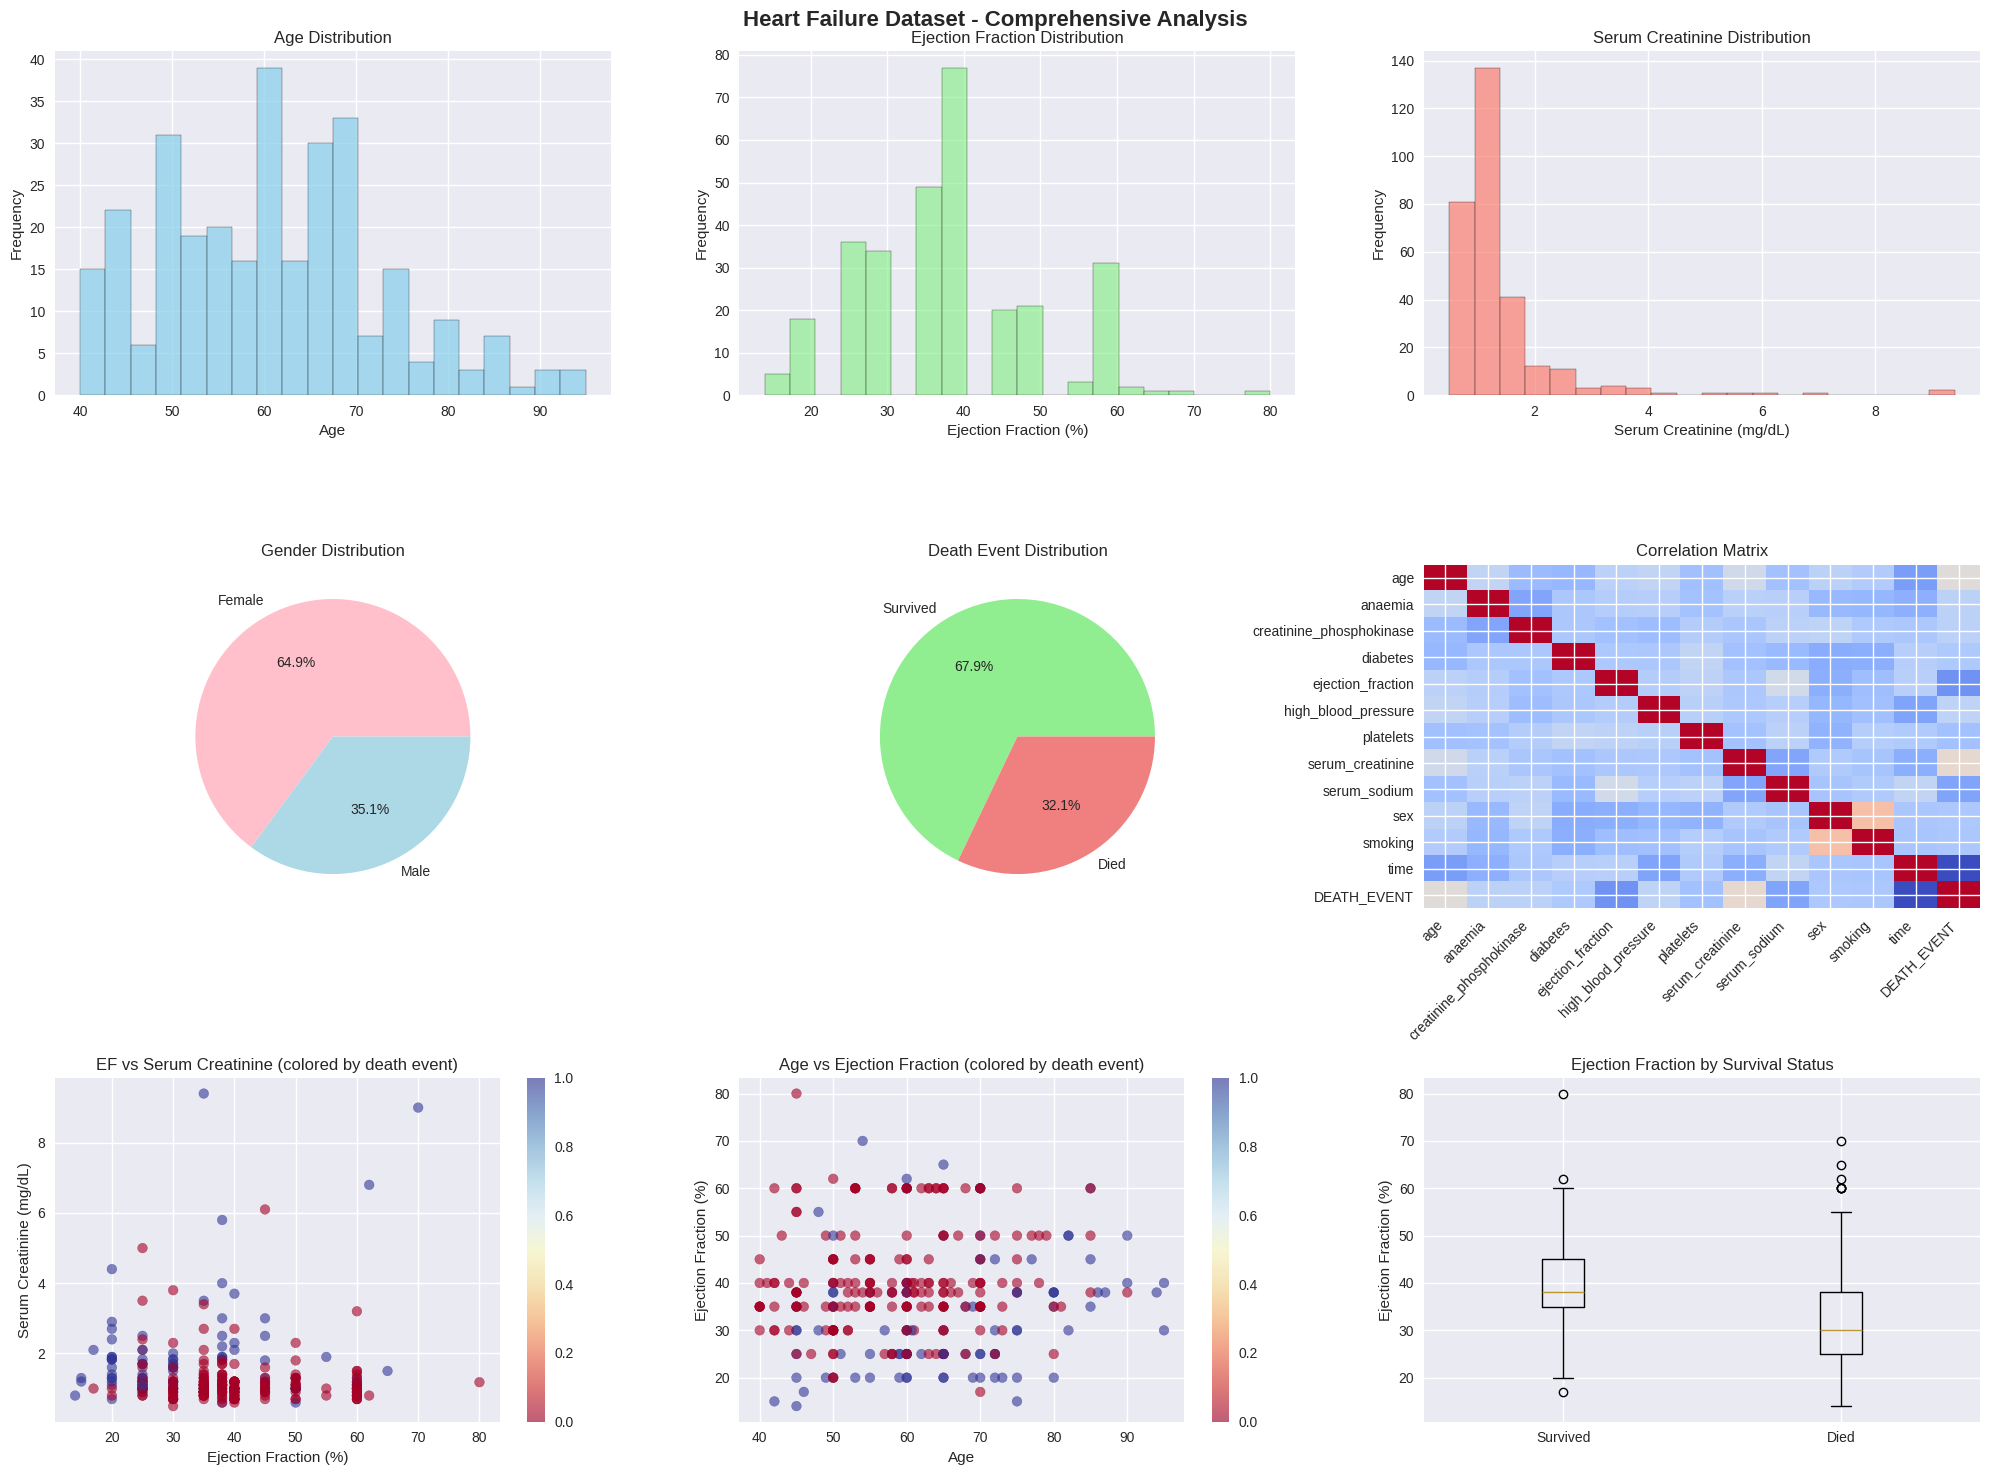

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Heart Failure Dataset - Comprehensive Analysis', fontsize=16, fontweight='bold')

axes[0,0].hist(df['age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

axes[0,1].hist(df['ejection_fraction'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Ejection Fraction Distribution')
axes[0,1].set_xlabel('Ejection Fraction (%)')
axes[0,1].set_ylabel('Frequency')

axes[0,2].hist(df['serum_creatinine'], bins=20, alpha=0.7, color='salmon', edgecolor='black')
axes[0,2].set_title('Serum Creatinine Distribution')
axes[0,2].set_xlabel('Serum Creatinine (mg/dL)')
axes[0,2].set_ylabel('Frequency')

gender_counts = df['sex'].value_counts()
axes[1,0].pie(gender_counts.values, labels=['Female', 'Male'], autopct='%1.1f%%',
              colors=['pink', 'lightblue'])
axes[1,0].set_title('Gender Distribution')

death_counts = df['DEATH_EVENT'].value_counts()
axes[1,1].pie(death_counts.values, labels=['Survived', 'Died'], autopct='%1.1f%%',
              colors=['lightgreen', 'lightcoral'])
axes[1,1].set_title('Death Event Distribution')

numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
im = axes[1,2].imshow(corr_matrix, cmap='coolwarm', aspect='auto')
axes[1,2].set_title('Correlation Matrix')
axes[1,2].set_xticks(range(len(numeric_cols)))
axes[1,2].set_yticks(range(len(numeric_cols)))
axes[1,2].set_xticklabels(numeric_cols, rotation=45, ha='right')
axes[1,2].set_yticklabels(numeric_cols)

scatter = axes[2,0].scatter(df['ejection_fraction'], df['serum_creatinine'],
                           c=df['DEATH_EVENT'], cmap='RdYlBu', alpha=0.6)
axes[2,0].set_xlabel('Ejection Fraction (%)')
axes[2,0].set_ylabel('Serum Creatinine (mg/dL)')
axes[2,0].set_title('EF vs Serum Creatinine (colored by death event)')
plt.colorbar(scatter, ax=axes[2,0])

scatter2 = axes[2,1].scatter(df['age'], df['ejection_fraction'],
                            c=df['DEATH_EVENT'], cmap='RdYlBu', alpha=0.6)
axes[2,1].set_xlabel('Age')
axes[2,1].set_ylabel('Ejection Fraction (%)')
axes[2,1].set_title('Age vs Ejection Fraction (colored by death event)')
plt.colorbar(scatter2, ax=axes[2,1])

death_labels = ['Survived', 'Died']
axes[2,2].boxplot([df[df['DEATH_EVENT']==0]['ejection_fraction'],
                   df[df['DEATH_EVENT']==1]['ejection_fraction']],
                  labels=death_labels)
axes[2,2].set_title('Ejection Fraction by Survival Status')
axes[2,2].set_ylabel('Ejection Fraction (%)')

plt.tight_layout()
plt.show()

# Feature Selection and Preprocessing

In [ ]:
clustering_features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium',
                      'creatinine_phosphokinase', 'platelets']

print(f"Selected features for clustering: {clustering_features}")
X = df[clustering_features].copy()
print(f"\n Missing values in selected features:")
print(X.isnull().sum())
print(f"\n Statistics of selected features:")
print(X.describe())

# Data Standardization and PCA Analysis

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features standardized successfully")
print(f"Scaled data shape: {X_scaled.shape}")

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance by Component')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
cumsum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumsum_var) + 1), cumsum_var, 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.95, color='k', linestyle='--', alpha=0.5, label='95% threshold')
plt.legend()
plt.subplot(1, 3, 3)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['DEATH_EVENT'],
                     cmap='RdYlBu', alpha=0.6)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA - First Two Components')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

print(f"\n Explained variance by first 2 components: {pca.explained_variance_ratio_[:2].sum():.2%}")